## Visualization of Blending Functions

Zero-padding at convolutional layers allow an output of the same size as the input, but the prediction is usually worse along the border of each input volume. Therefire we performe inference of overlopping volumes to alleviate the border artifacts. This demo visulizes the patterns of different blending functions/parameters.

In [1]:
import numpy as np
from connectomics.data.utils import blend_gaussian, blend_bump

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show(image, cmap='gray', title='Test Title', interpolation=None):
    num_imgs = image.shape[0]
    fig = plt.figure(figsize=(20., 3.))
    fig.suptitle(title, fontsize=15)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_imgs),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    image_list = np.split(image, num_imgs, 0)
    for ax, im in zip(grid, [np.squeeze(x) for x in image_list]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap=cmap, interpolation=interpolation,
                  vmin=image.min(), vmax=image.max())
        # ax.imshow(im, cmap=cmap, interpolation=interpolation)
        ax.axis('off')

    plt.show()

### Visualization of the blending matrix

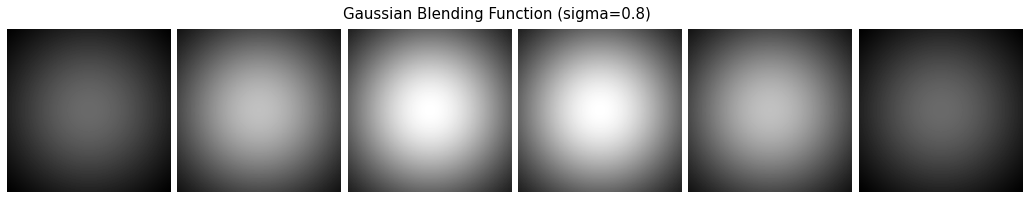

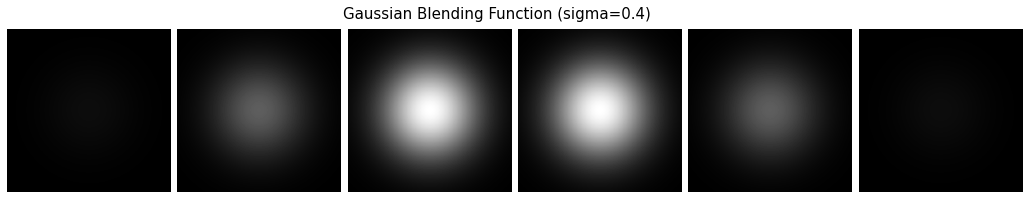

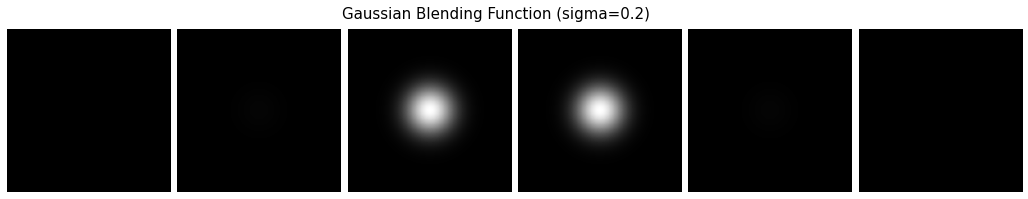

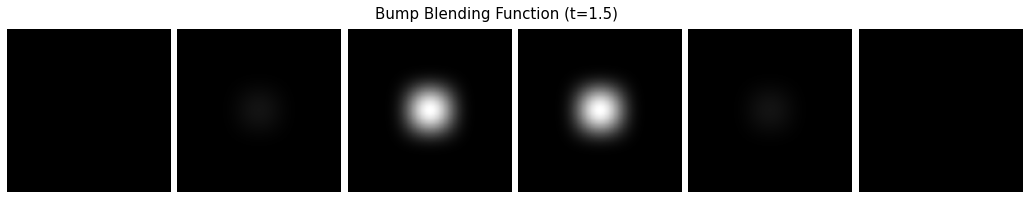

In [2]:
sz = (6, 128, 128)
ww_g1 = blend_gaussian(sz, sigma=0.8)
ww_g2 = blend_gaussian(sz, sigma=0.4)
ww_g3 = blend_gaussian(sz, sigma=0.2)
ww_b = blend_bump(sz, t=1.5)
show(ww_g1, title='Gaussian Blending Function (sigma=0.8)')
show(ww_g2, title='Gaussian Blending Function (sigma=0.4)')
show(ww_g3, title='Gaussian Blending Function (sigma=0.2)')
show(ww_b, title='Bump Blending Function (t=1.5)')

### Visualization of the overlapping pattern

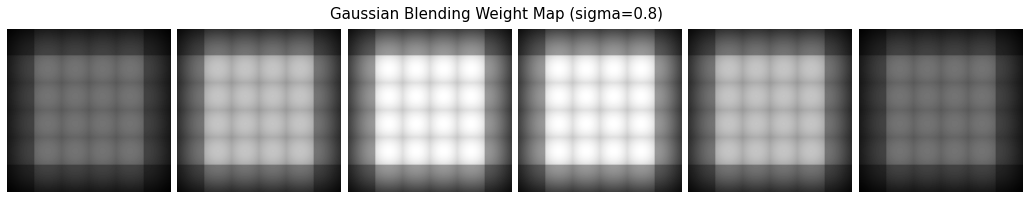

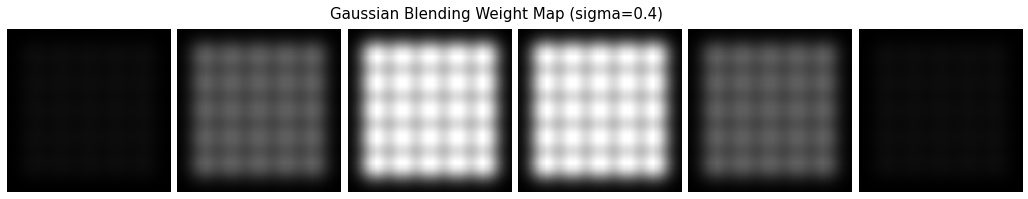

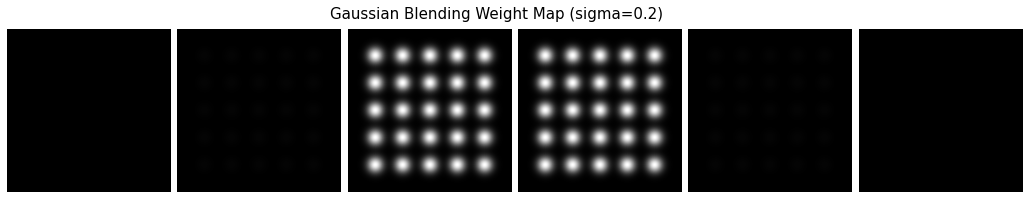

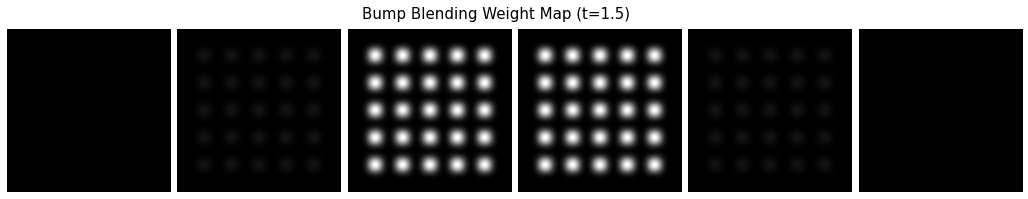

In [3]:
def overlap_infenrece(vol, ww, size_factor):
    """Simulate inference with 50% overlap for x-y plane.
    """
    H, W = ww.shape[1:]
    stride = ww.shape[1] // 2
    for i in range(size_factor*2-1):
        for j in range(size_factor*2-1):
            vol[:, i*stride:i*stride+H, j*stride:j*stride+W] += ww
    return vol

size_factor = 3
vol_b = np.zeros((sz[0], sz[1]*size_factor, sz[2]*size_factor), dtype=np.float32)
vol_g1 = vol_b.copy()
vol_g2 = vol_b.copy()
vol_g3 = vol_b.copy()

vol_b = overlap_infenrece(vol_b, ww_b, size_factor)
vol_g1 = overlap_infenrece(vol_g1, ww_g1, size_factor)
vol_g2 = overlap_infenrece(vol_g2, ww_g2, size_factor)
vol_g3 = overlap_infenrece(vol_g3, ww_g3, size_factor)

show(vol_g1, title='Gaussian Blending Weight Map (sigma=0.8)')
show(vol_g2, title='Gaussian Blending Weight Map (sigma=0.4)')
show(vol_g3, title='Gaussian Blending Weight Map (sigma=0.2)')
show(vol_b, title='Bump Blending Weight Map (t=1.5)')